In [1]:
#To access python data science libraries and visualise data and render plots in the Jupyter Notebook
import os
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import math
import datetime as dt
%matplotlib inline

In [2]:
#Save the list of all csv files
csv1 = pd.read_csv('data1_cleaned.csv')
csv2 = pd.read_csv('data2_cleaned.csv')
csv3 = pd.read_csv('data3_cleaned.csv')
csv4 = pd.read_csv('data4_cleaned.csv')

In [3]:
#Merged all files in the list based on matching 'customer id' column
csv1_2 = pd.merge(csv1, csv2, on=['customer_id'])
csv1_2_3 = pd.merge(csv1_2, csv3, on=['customer_id'])

In [4]:
#Export to csv
csv1_2_3.to_csv( "merged.csv", index=False, encoding='utf-8-sig')

In [5]:
#Ascending order
df = csv1_2_3.sort_values(by=['customer_id'])

In [6]:
df

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,dob,job_title,job_industry_category,wealth_segment,deceased_indicator,...,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
88,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,False,...,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,37823.0
85,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,False,...,2017-03-27,0.0,Approved,Norco Bicycles,Mountain,low,small,688.63,612.88,33455.0
86,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,False,...,2017-03-29,1.0,Approved,Giant Bicycles,Standard,high,medium,1274.93,764.96,35378.0
87,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,False,...,2017-04-06,1.0,Approved,Solex,Standard,medium,medium,1577.53,826.51,39526.0
89,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,False,...,2017-05-19,0.0,Approved,Giant Bicycles,Road,medium,medium,1538.99,829.65,33552.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4636,3500,Josy,Fleeman,Female,71,1967-07-21,Administrative Officer,Entertainment,Affluent Customer,False,...,2017-03-14,1.0,Approved,OHM Cycles,Standard,high,medium,1458.17,874.90,38750.0
4635,3500,Josy,Fleeman,Female,71,1967-07-21,Administrative Officer,Entertainment,Affluent Customer,False,...,2017-02-16,0.0,Approved,WeareA2B,Standard,medium,medium,1228.07,400.91,36668.0
4634,3500,Josy,Fleeman,Female,71,1967-07-21,Administrative Officer,Entertainment,Affluent Customer,False,...,2017-01-11,0.0,Approved,WeareA2B,Standard,medium,medium,60.34,45.26,34165.0
4633,3500,Josy,Fleeman,Female,71,1967-07-21,Administrative Officer,Entertainment,Affluent Customer,False,...,2017-01-09,1.0,Approved,Giant Bicycles,Road,medium,medium,792.90,594.68,33879.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19968 entries, 88 to 4637
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          19968 non-null  int64  
 1   first_name                           19968 non-null  object 
 2   last_name                            19326 non-null  object 
 3   gender                               19968 non-null  object 
 4   past_3_years_bike_related_purchases  19968 non-null  int64  
 5   dob                                  19522 non-null  object 
 6   job_title                            19968 non-null  object 
 7   job_industry_category                19968 non-null  object 
 8   wealth_segment                       19968 non-null  object 
 9   deceased_indicator                   19968 non-null  bool   
 10  owns_car                             19968 non-null  bool   
 11  tenure                      

In [8]:
df.describe()

,customer_id,past_3_years_bike_related_purchases,tenure,postcode,property_valuation,transaction_id,product_id,online_order,list_price,standard_cost,product_first_sold_date
count,19968.000000,19968.000000,19968.000000,19968.000000,19968.000000,19968.000000,19968.000000,19968.000000,19968.000000,19794.000000,19968.000000
mean,1740.254307,48.757412,10.689052,2987.623347,7.516376,9997.846504,45.365986,0.501102,1107.780004,556.082756,38198.751474
std,1009.819066,28.611359,5.611093,851.306647,2.824783,5773.929973,30.750115,0.500011,582.852548,405.798188,2860.784340
min,1.000000,0.000000,1.000000,2000.000000,1.000000,1.000000,0.000000,0.000000,12.010000,7.210000,33259.000000
25%,861.750000,24.000000,6.000000,2200.000000,6.000000,4997.750000,18.000000,0.000000,575.270000,215.140000,35667.000000
50%,1739.500000,48.000000,11.000000,2767.000000,8.000000,9996.500000,44.000000,1.000000,1163.890000,507.580000,38206.000000
75%,2614.250000,73.000000,15.000000,3754.000000,10.000000,14996.250000,72.000000,1.000000,1635.300000,795.100000,40672.000000
max,3500.000000,99.000000,22.000000,4883.000000,12.000000,20000.000000,100.000000,1.000000,2091.470000,1759.850000,42710.000000


In [9]:
df.duplicated().sum()

0

In [10]:
df.isnull().sum()

customer_id                              0
first_name                               0
last_name                              642
gender                                   0
past_3_years_bike_related_purchases      0
dob                                    446
job_title                                0
job_industry_category                    0
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
transaction_id                           0
product_id                               0
transaction_date                         0
online_order                             0
order_status                             0
brand                                    0
product_lin

In [11]:
df['last_name'].fillna(method='ffill', inplace = True)

In [12]:
df['dob'].fillna(method='ffill', inplace = True)

In [13]:
df.standard_cost.mode()

0    388.92
dtype: float64

In [14]:
df.standard_cost.mean()

556.082755885636

In [15]:
df['standard_cost'].fillna(df['standard_cost'].mean(), inplace = True)

In [16]:
df.isna().sum()

customer_id                            0
first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
dob                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
address                                0
postcode                               0
state                                  0
country                                0
property_valuation                     0
transaction_id                         0
product_id                             0
transaction_date                       0
online_order                           0
order_status                           0
brand                                  0
product_line                           0
product_class   

In [17]:
df['dob'] = df['dob'].apply(pd.to_datetime)

In [18]:
df.dtypes

customer_id                                     int64
first_name                                     object
last_name                                      object
gender                                         object
past_3_years_bike_related_purchases             int64
dob                                    datetime64[ns]
job_title                                      object
job_industry_category                          object
wealth_segment                                 object
deceased_indicator                               bool
owns_car                                         bool
tenure                                        float64
address                                        object
postcode                                        int64
state                                          object
country                                        object
property_valuation                              int64
transaction_id                                  int64
product_id                  

In [19]:
ref_date = dt.datetime.now()
df['Age'] = df['dob'].apply(lambda x: len(pd.date_range(start = x, end = ref_date, freq = 'Y')))

In [20]:
df = df[df.Age < 100]

In [21]:
df['transaction_month'] = pd.DatetimeIndex(df['dob']).month

/Users/mankityip/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
df['profit'] = df['list_price'] - df['standard_cost']

/Users/mankityip/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,dob,job_title,job_industry_category,wealth_segment,deceased_indicator,...,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Age,transaction_month,profit
88,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,False,...,Trek Bicycles,Road,low,small,1720.70,1531.42,37823.0,67,10,189.28
85,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,False,...,Norco Bicycles,Mountain,low,small,688.63,612.88,33455.0,67,10,75.75
86,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,False,...,Giant Bicycles,Standard,high,medium,1274.93,764.96,35378.0,67,10,509.97
87,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,False,...,Solex,Standard,medium,medium,1577.53,826.51,39526.0,67,10,751.02
89,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,False,...,Giant Bicycles,Road,medium,medium,1538.99,829.65,33552.0,67,10,709.34


In [24]:
df.tail()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,dob,job_title,job_industry_category,wealth_segment,deceased_indicator,...,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Age,transaction_month,profit
4636,3500,Josy,Fleeman,Female,71,1967-07-21,Administrative Officer,Entertainment,Affluent Customer,False,...,OHM Cycles,Standard,high,medium,1458.17,874.90,38750.0,53,7,583.27
4635,3500,Josy,Fleeman,Female,71,1967-07-21,Administrative Officer,Entertainment,Affluent Customer,False,...,WeareA2B,Standard,medium,medium,1228.07,400.91,36668.0,53,7,827.16
4634,3500,Josy,Fleeman,Female,71,1967-07-21,Administrative Officer,Entertainment,Affluent Customer,False,...,WeareA2B,Standard,medium,medium,60.34,45.26,34165.0,53,7,15.08
4633,3500,Josy,Fleeman,Female,71,1967-07-21,Administrative Officer,Entertainment,Affluent Customer,False,...,Giant Bicycles,Road,medium,medium,792.90,594.68,33879.0,53,7,198.22
4637,3500,Josy,Fleeman,Female,71,1967-07-21,Administrative Officer,Entertainment,Affluent Customer,False,...,Solex,Standard,medium,medium,71.49,53.62,41245.0,53,7,17.87


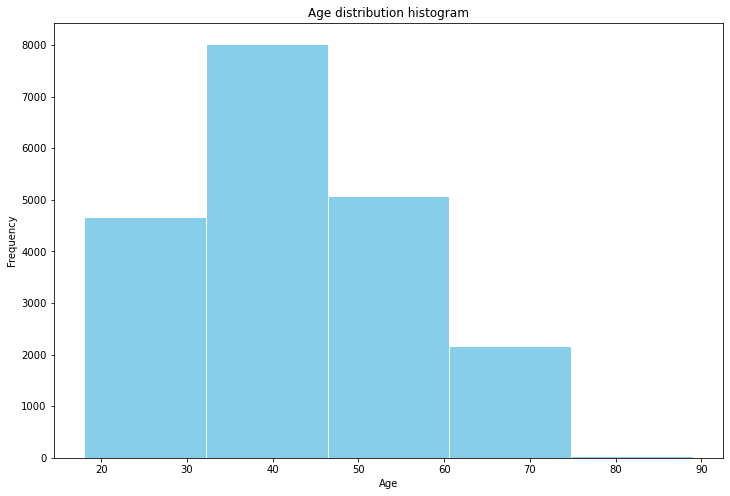

In [25]:
#Data visualisation
plt.figure(figsize = (12,8))
plt.hist(df['Age'], color = 'skyblue', edgecolor = 'white', bins = 5)
plt.title('Age distribution histogram')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('age_dist_histogram.png')
plt.show()

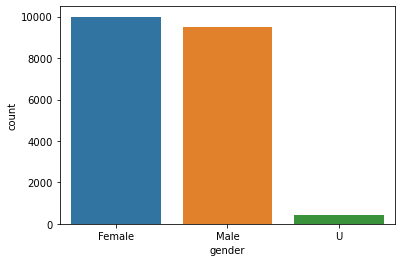

In [26]:
sn.countplot(x = 'gender', data = df)
plt.show()

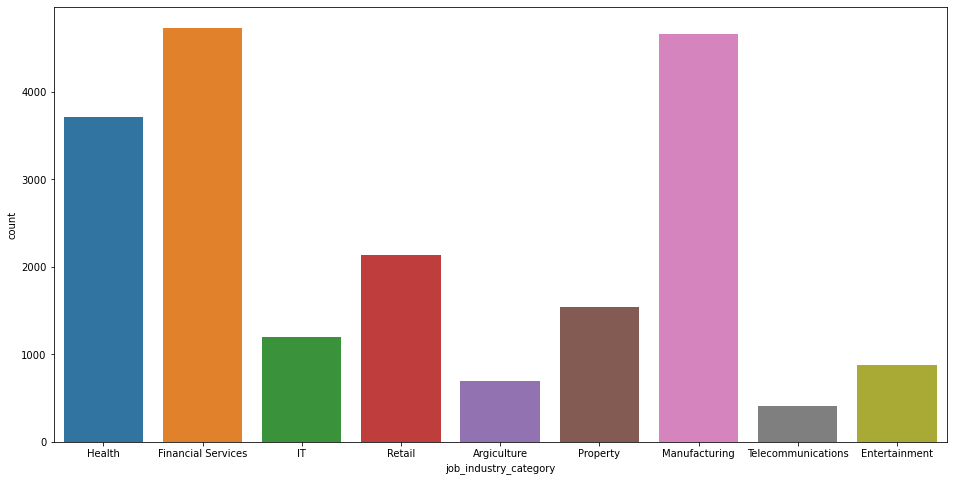

In [27]:
plt.figure(figsize = (16,8))
sn.countplot(x='job_industry_category', data = df)
plt.show()

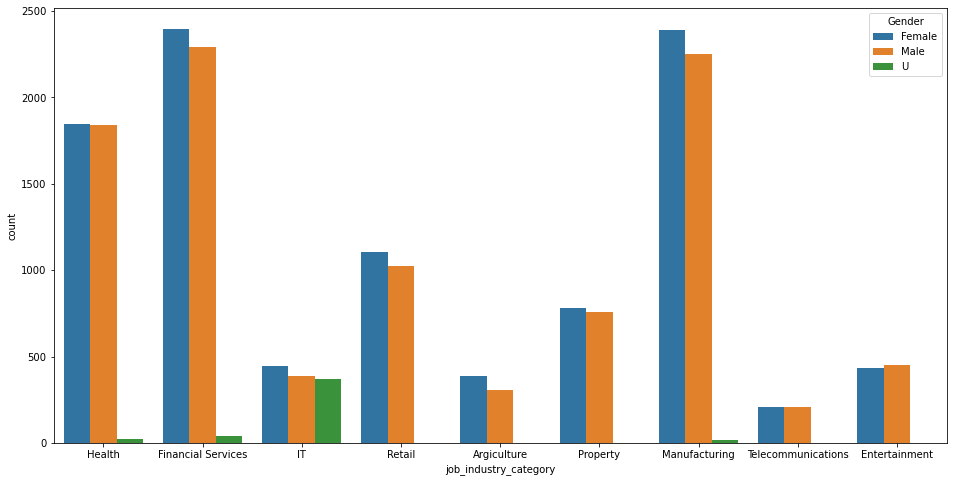

In [28]:
plt.figure(figsize = (16,8))
sn.countplot(x='job_industry_category', data=df, hue='gender')
plt.legend(title='Gender', loc='upper right', fancybox=True)
plt.show()

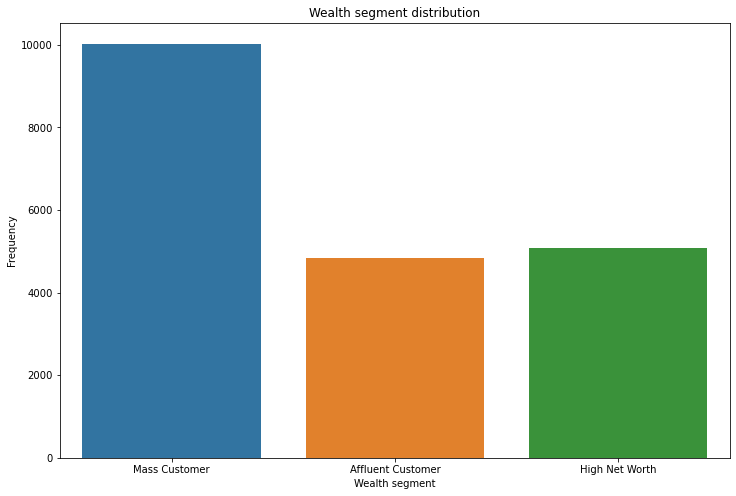

In [29]:
plt.figure(figsize = (12,8))
sn.countplot(x = 'wealth_segment', data = df)
plt.title('Wealth segment distribution')
plt.xlabel('Wealth segment')
plt.ylabel('Frequency')
plt.show()

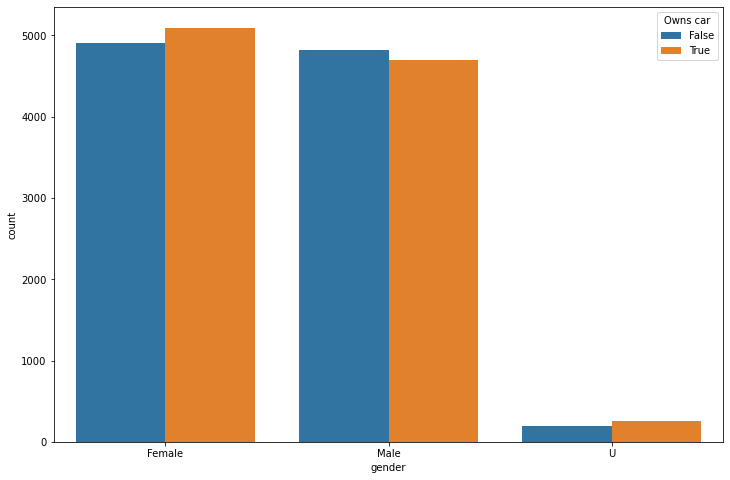

In [30]:
plt.figure(figsize = (12,8))
sn.countplot(x='gender', data=df, hue='owns_car')
plt.legend(title='Owns car', loc='upper right', fancybox=True)
plt.savefig('owns_car.png')
plt.show()

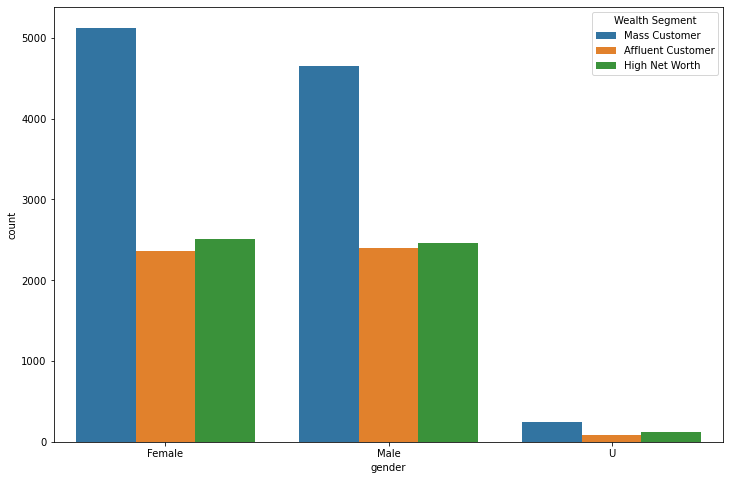

In [31]:
plt.figure(figsize = (12,8))
sn.countplot(x='gender', data=df, hue='wealth_segment')
plt.legend(title='Wealth Segment', loc='upper right', fancybox=True)
plt.show()

<Figure size 1152x576 with 0 Axes>

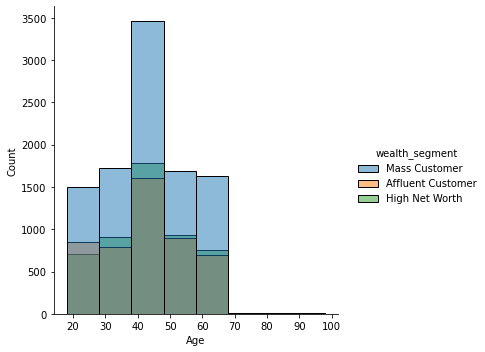

In [40]:
plt.figure(figsize = (16,8))
sn.displot(x='Age', binwidth=10, data=df, hue='wealth_segment')
plt.show()

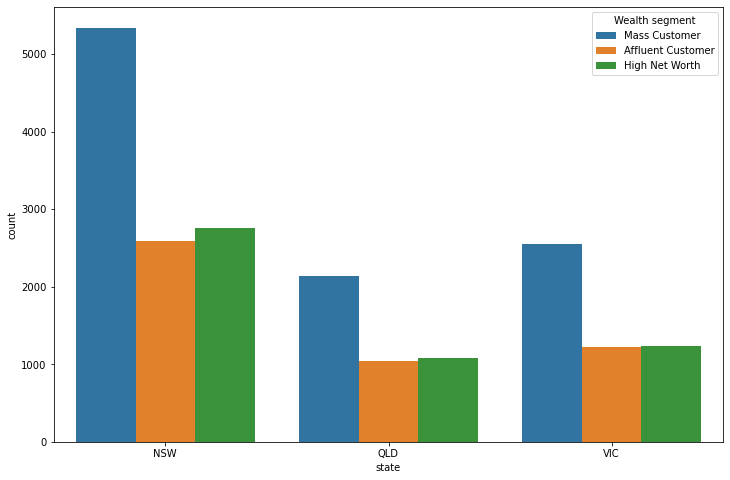

In [33]:
plt.figure(figsize = (12,8))
sn.countplot(x='state', data=df, hue='wealth_segment')
plt.legend(title='Wealth segment', loc='upper right', fancybox=True)
plt.show()

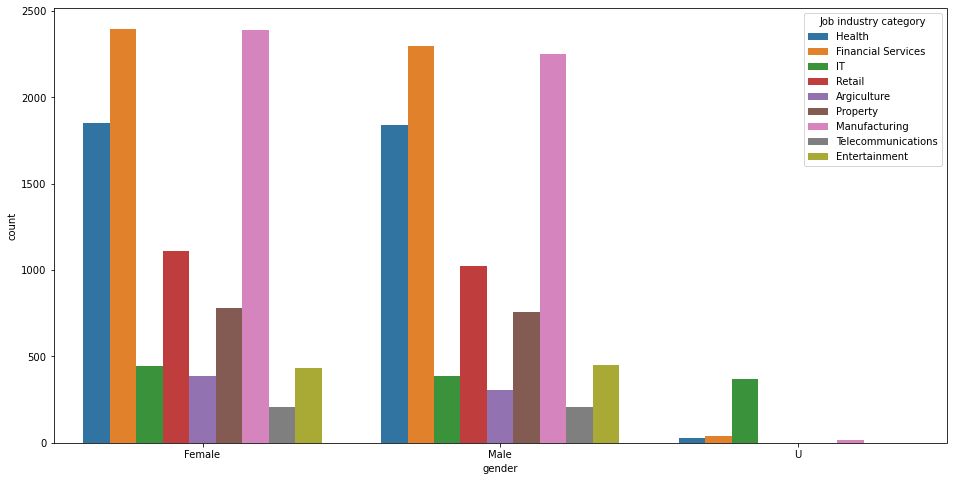

In [34]:
plt.figure(figsize=(16,8))
sn.countplot(x='gender', data=df, hue='job_industry_category')
plt.legend(title='Job industry category', loc='upper right', fancybox=True)
plt.show()

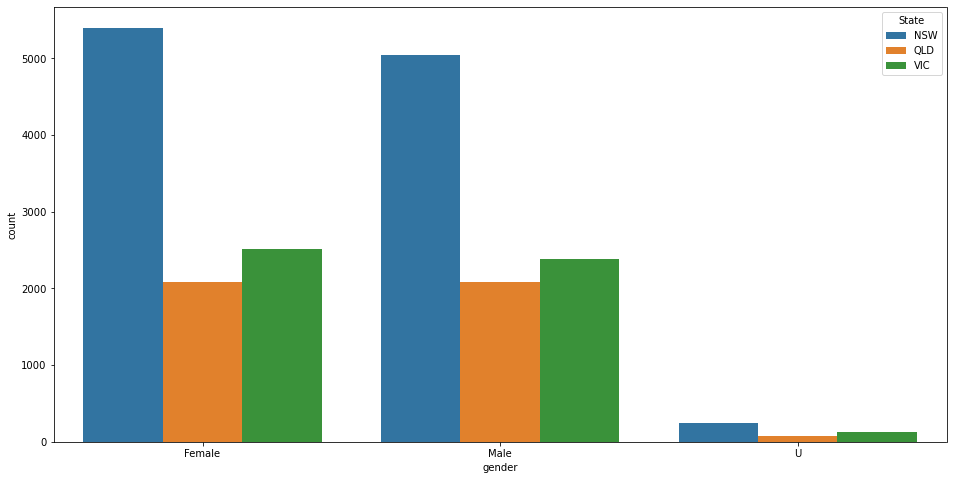

In [35]:
plt.figure(figsize = (16,8))
sn.countplot(x='gender', data=df, hue='state')
plt.legend(title='State', loc='upper right', fancybox=True)
plt.show()

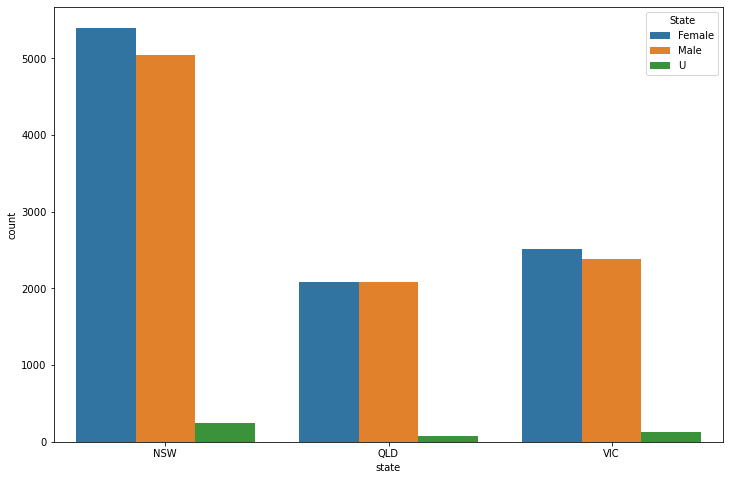

In [36]:
plt.figure(figsize = (12,8))
sn.countplot(x = 'state', data = df, hue = 'gender')
plt.legend(title='State', loc='upper right', fancybox=True)
plt.savefig('states.png')
plt.show()

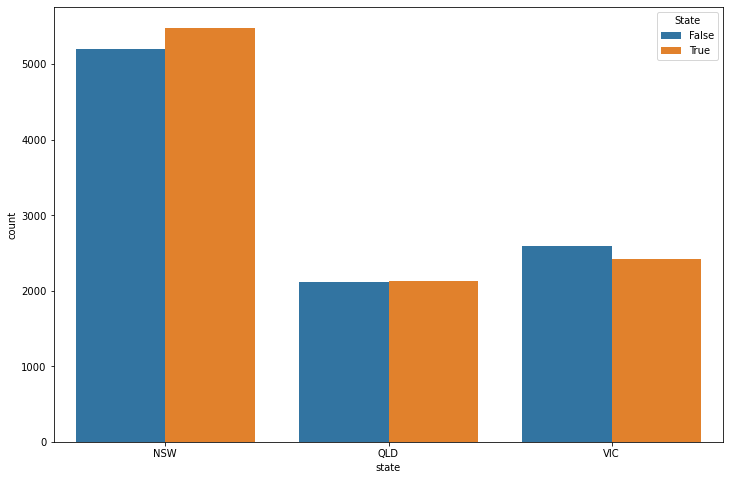

In [37]:
plt.figure(figsize = (12,8))
sn.countplot(x = 'state', data = df, hue = 'owns_car')
plt.legend(title='State', loc='upper right', fancybox=True)
plt.show()

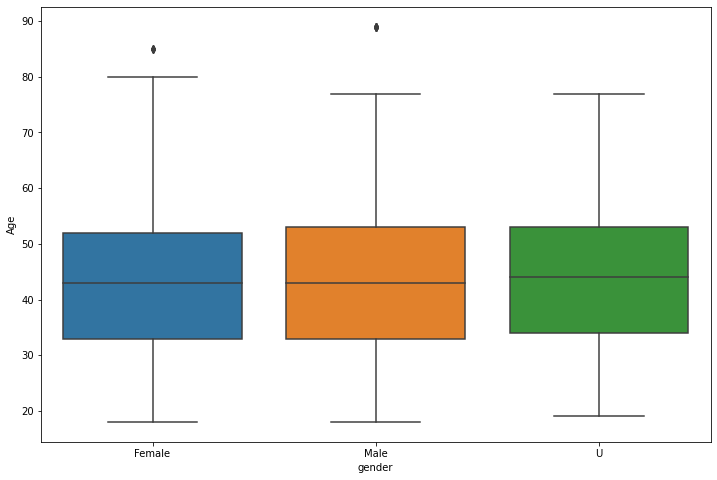

In [38]:
plt.figure(figsize = (12,8))
sn.boxplot(x = df['gender'], y = df['Age'])
plt.savefig('age_boxplot.png')
plt.show()

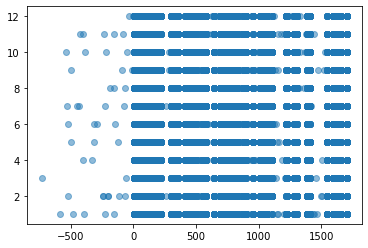

In [39]:
plt.scatter(df['profit'], df['transaction_month'], alpha=0.5)
colors=np.random.rand()
plt.show()